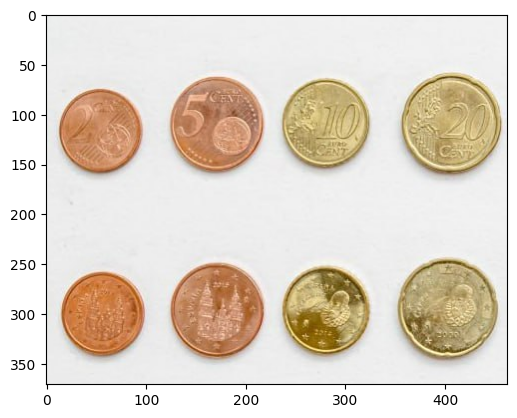

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bgr_para = cv2.imread('para.png')
rgb_para = cv2.cvtColor(bgr_para, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_para)
plt.show()

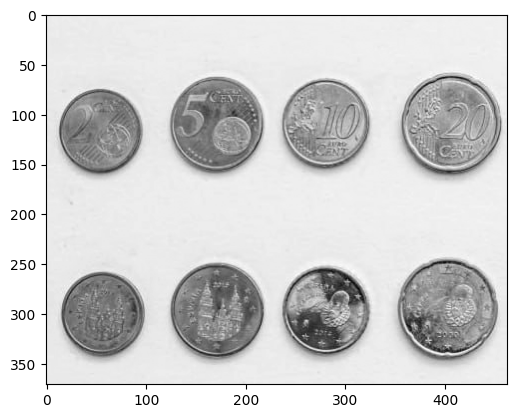

In [ ]:
gray_para = cv2.cvtColor(rgb_para, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_para, cmap='gray')
plt.show()

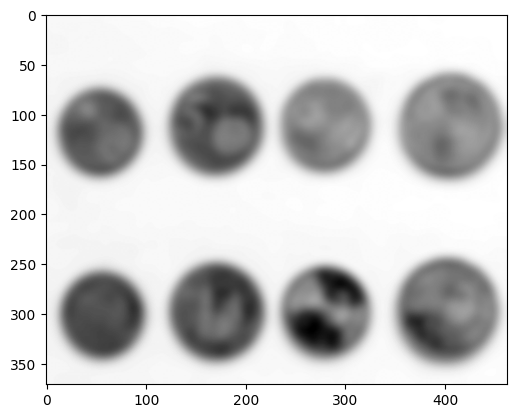

In [ ]:
censored_para = cv2.GaussianBlur(gray_para, (31, 31), 0)
plt.imshow(censored_para, cmap='gray')
plt.show()

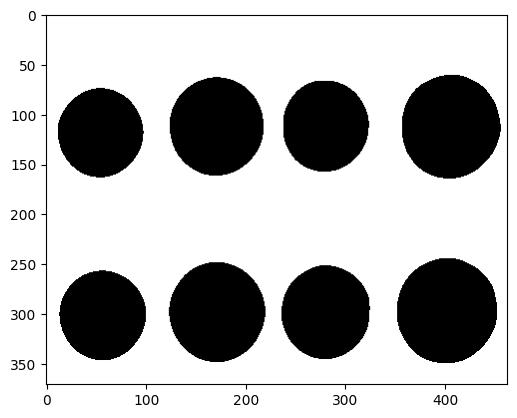

In [ ]:
_, thresh_para = cv2.threshold(censored_para, 195, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_para, cmap='gray')
plt.show()

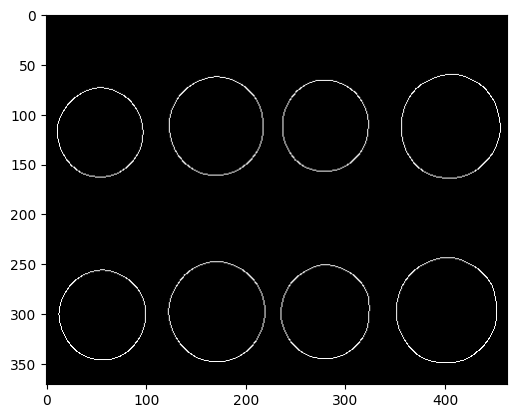

In [ ]:
canny_para = cv2.Canny(thresh_para, 100, 100)
plt.imshow(canny_para, cmap='gray')
plt.show()

6096.0
6578.0
7568.5
8380.0
5990.0
6254.0
7341.5
8132.5


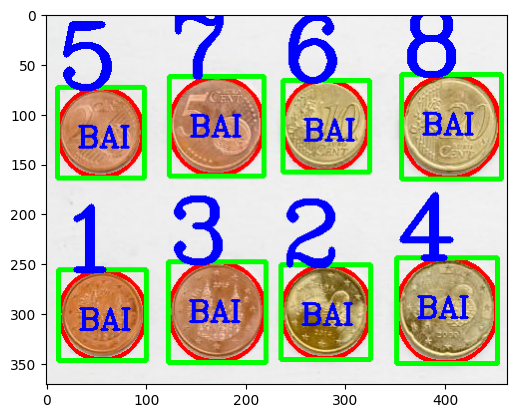

In [ ]:
contours, hierarchy = cv2.findContours(canny_para,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_para = cv2.drawContours(rgb_para, contours, -1, (255,0,0), 4)

for i, contour in enumerate(contours):
  if cv2.contourArea(contour) > 180:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(contour_para, (x,y), (x+w, y+h), (0,255,0), 4)
    cv2.putText(contour_para, str(i+1), (x,y), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255), 5)
    cv2.putText(contour_para, "BAI", (x+20,y+60), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
    print(cv2.contourArea(contour))
plt.imshow(contour_para)